In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import nltk
nltk.download('punkt_tab');
import re  
import string
from collections import Counter

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\abcd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [27]:
df = pd.read_csv('FinalSentiment.csv', index_col=0)

In [33]:
def get_df_info(df):
    print("\n\033[1mShape of DataFrame:\033[0m ", df.shape)
    print("\n\033[1mColumns in DataFrame:\033[0m ", df.columns.to_list())
    print("\n\033[1mData types of columns:\033[0m\n", df.dtypes)
    
    print("\n\033[1mInformation about DataFrame:\033[0m")
    df.info()
    
    print("\n\033[1mNumber of unique values in each column:\033[0m")
    for col in df.columns:
        print(f"\033[1m{col}\033[0m: {df[col].nunique()}")
        
    print("\n\033[1mNumber of null values in each column:\033[0m\n", df.isnull().sum())
    
    print("\n\033[1mNumber of duplicate rows:\033[0m ", df.duplicated().sum())
    
    print("\n\033[1mDescriptive statistics of DataFrame:\033[0m\n",) 
    
    return df.describe().transpose()

get_df_info(df)


Shape of DataFrame:  (46270, 17)

Columns in DataFrame:  ['author', 'age', 'gender', 'location', 'statement', 'status', 'mental_illness_type', 'Mental_Illness_Category', 'text_length', 'encoded_status', 'statement_avg_word_length', 'cleaned_statement_avg_word_length', 'text_length_bin', 'sentiment_score', 'contains_question', 'has_negation', 'exclamation_count']

Data types of columns:
 author                                object
age                                    int64
gender                                object
location                              object
statement                             object
status                                object
mental_illness_type                   object
Mental_Illness_Category               object
text_length                            int64
encoded_status                         int64
statement_avg_word_length            float64
cleaned_statement_avg_word_length    float64
text_length_bin                       object
sentiment_score         

count        mean         std        min  \
age                                46270.0   50.100086   23.363616  10.000000   
text_length                        46270.0  519.978042  614.177456   2.000000   
encoded_status                     46270.0    3.108947    1.785946   0.000000   
statement_avg_word_length          46270.0    4.879927    0.621268   1.000000   
cleaned_statement_avg_word_length  46270.0    4.663027    0.603288   1.000000   
sentiment_score                    46270.0   -0.000589    0.565184  -0.999988   
exclamation_count                  46270.0    0.423579    0.725672   0.000000   

                                         25%         50%         75%  \
age                                30.000000   50.000000   70.000000   
text_length                        77.000000  308.000000  722.000000   
encoded_status                      2.000000    3.000000    5.000000   
statement_avg_word_length           4.600000    4.928105    5.225752   
cleaned_statement_avg_word_length   4.438029    4.749070    5.000000   
sentiment_score                    -0.473943   -0.001074    0.471899   
exclamation_count                   0.000000    0.000000    1.000000   

                                           max  
age                                  90.000000  
text_length                        3690.000000  
encoded_status                        6.000000  
statement_avg_word_length             7.187500  
cleaned_statement_avg_word_length     8.000000  
sentiment_score                       0.999973  
exclamation_count                     3.000000

In [5]:
df.status.value_counts()

status
normal                  14441
depression              13481
suicidal                 9425
anxiety                  3365
bipolar                  2469
stress                   2191
personality disorder      898
Name: count, dtype: int64

In [7]:
len_text = [len(tx) for tx in df['statement'].to_list()]
print(f'Max Length : {np.max(len_text)}')
print(f'Min Length : {np.min(len_text)}')
print(f'Mean Length : {round(np.mean(len_text),2)}')
print(f'Std Length : {round(np.std(len_text),2)}')
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

Max Length : 3817
Min Length : 2
Mean Length : 530.96
Std Length : 627.04
Mew + 2sigma : 1785.05


C:\Users\abcd\AppData\Local\Temp\ipykernel_8376\2197183410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='status', palette='Set2', ax=ax[0])


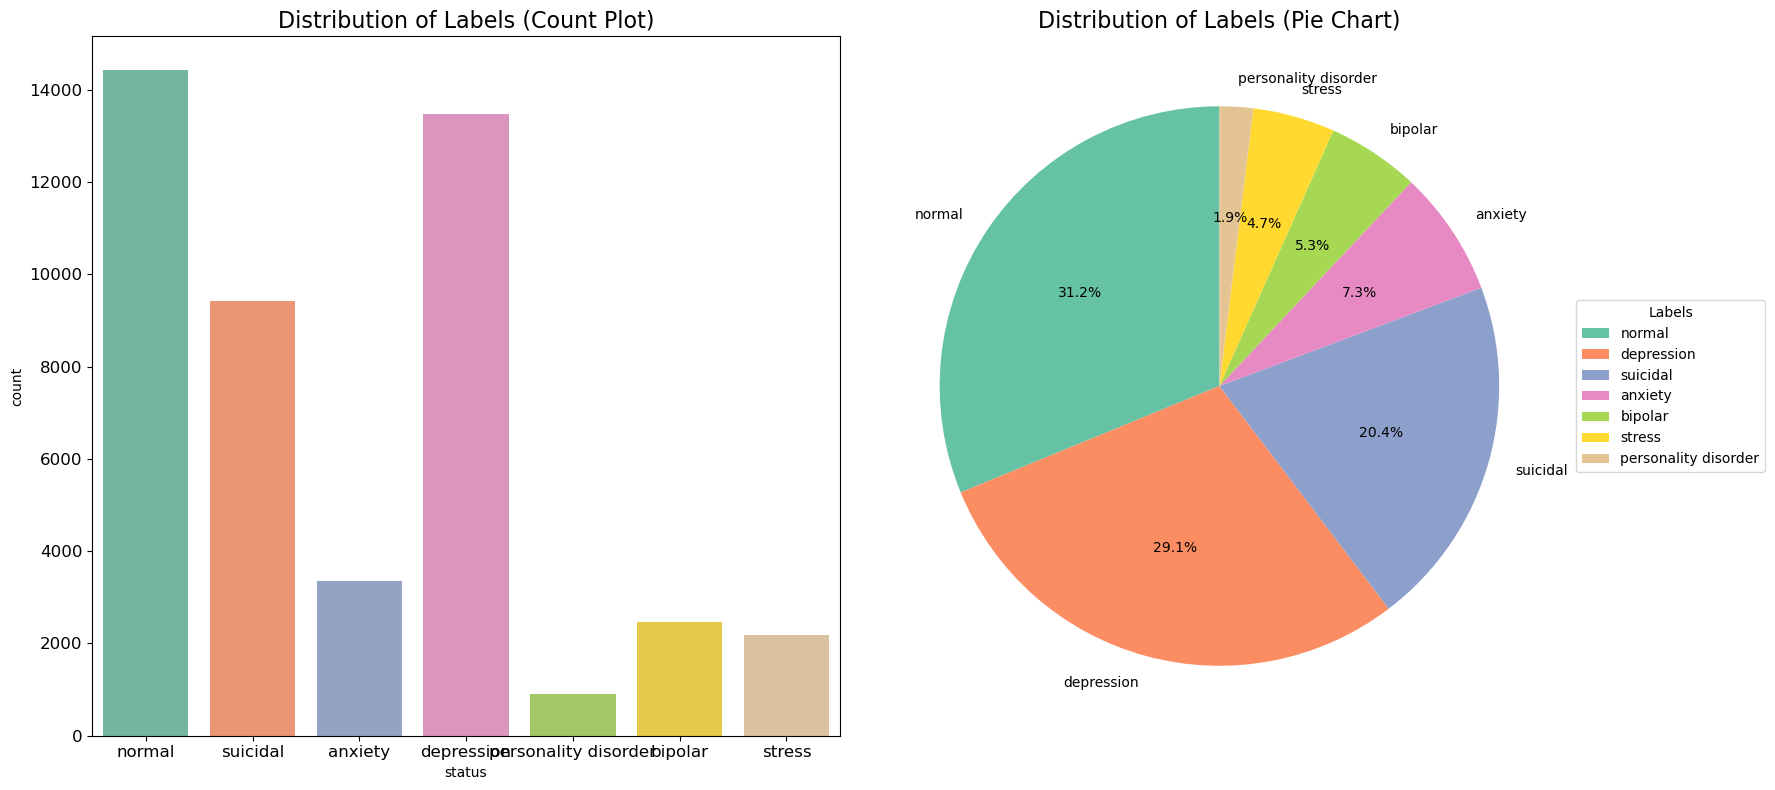

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Count Plot on the left
sns.countplot(data=df, x='status', palette='Set2', ax=ax[0])
ax[0].set_title('Distribution of Labels (Count Plot)', fontsize=16)
ax[0].tick_params(axis='x', labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)

# Pie Chart on the right
label_counts = df['status'].value_counts()
wedges, texts, autotexts = ax[1].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', 
          colors=sns.color_palette('Set2', len(label_counts)), startangle=90)

# Add a legend to the pie chart
ax[1].legend(wedges, label_counts.index, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
ax[1].set_title('Distribution of Labels (Pie Chart)', fontsize=16)

# Adjust the layout
plt.tight_layout()
plt.show()

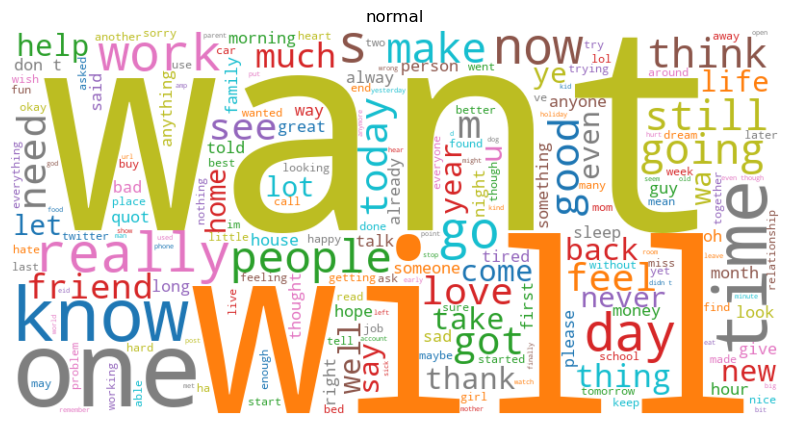

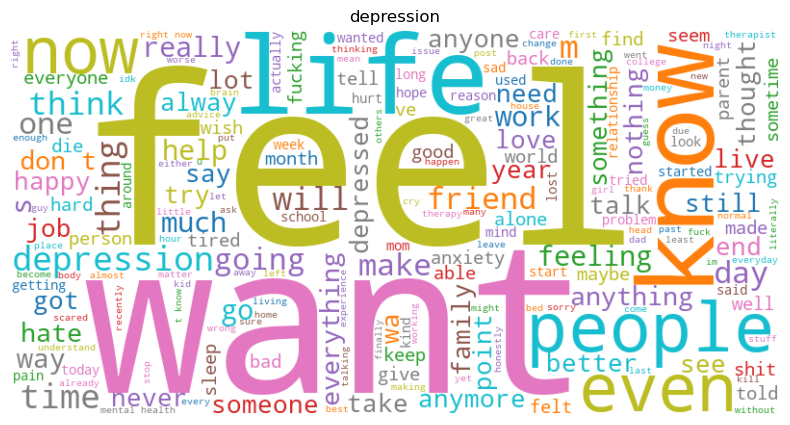

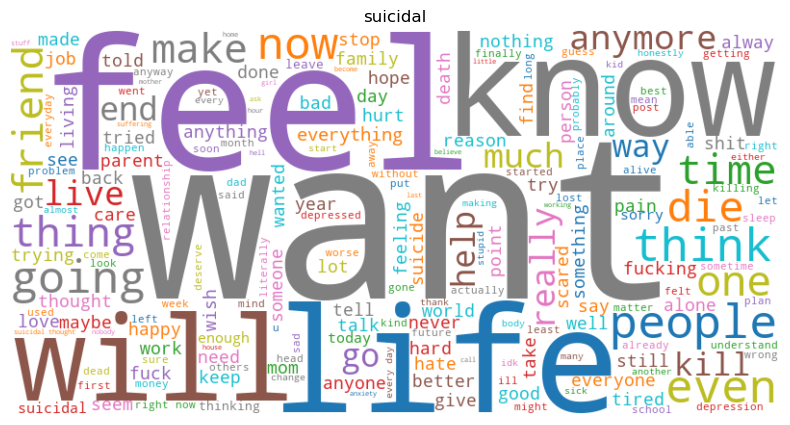

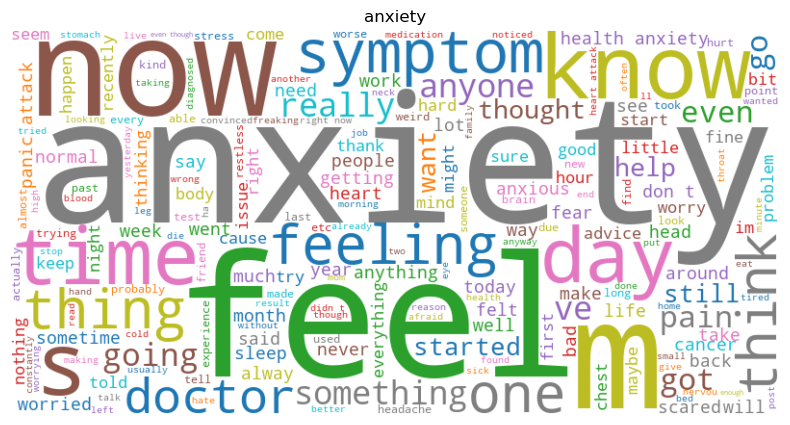

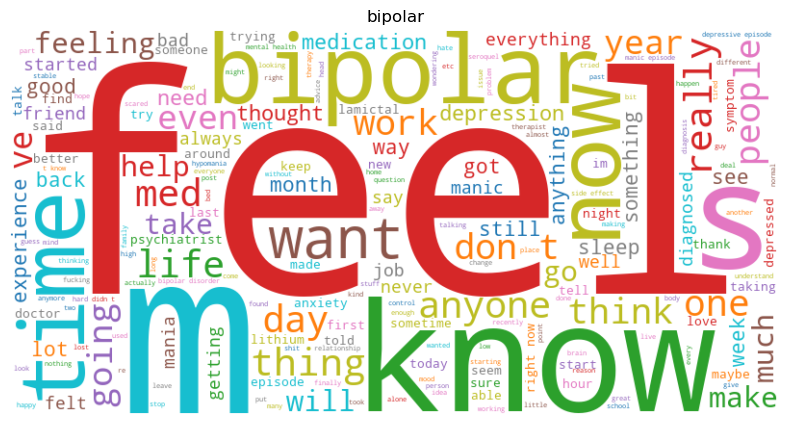

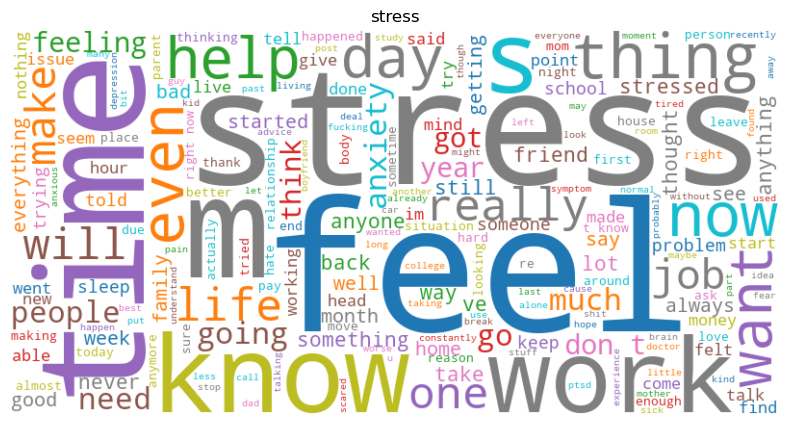

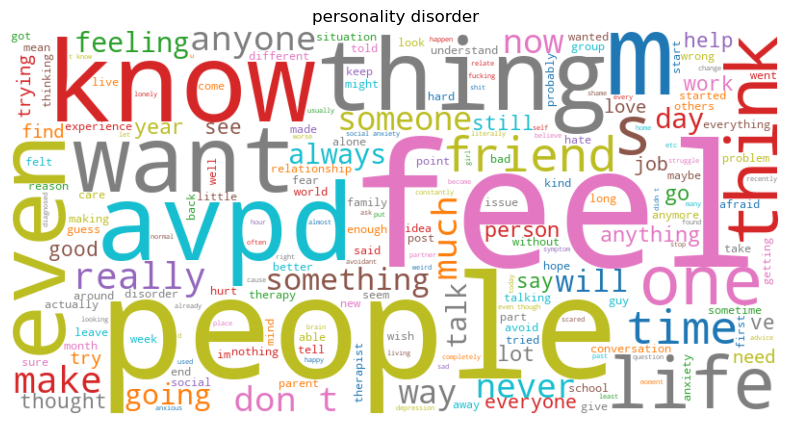

In [21]:
categories = df['status'].value_counts().index

for cat in categories:
    statements = " ".join(df[df['status'] == cat]['statement'])
    
    wordcloud = WordCloud(width=800, height=400,  colormap="tab10", background_color="white").generate(statements)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

In [7]:
def clean_and_tokenize(text):
    if pd.isna(text):
        return []
    text = text.lower()
    text = re.sub(r'[{}]'.format(string.punctuation), '', text)  # Remove punctuation
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return filtered_tokens

In [9]:
category_word_counts = {}

In [11]:
# Process each mental illness category
for category in df['Mental_Illness_Category'].unique():
    all_words = []
    statements = df[df['Mental_Illness_Category'] == category]['statement'].dropna()
    for statement in statements:
        all_words.extend(clean_and_tokenize(statement))
    category_word_counts[category] = Counter(all_words).most_common(15)

C:\Users\abcd\AppData\Local\Temp\ipykernel_21472\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppData\Local\Temp\ipykernel_21472\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppData\Local\Temp\ipykernel_21472\1170044804.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
C:\Users\abcd\AppDa

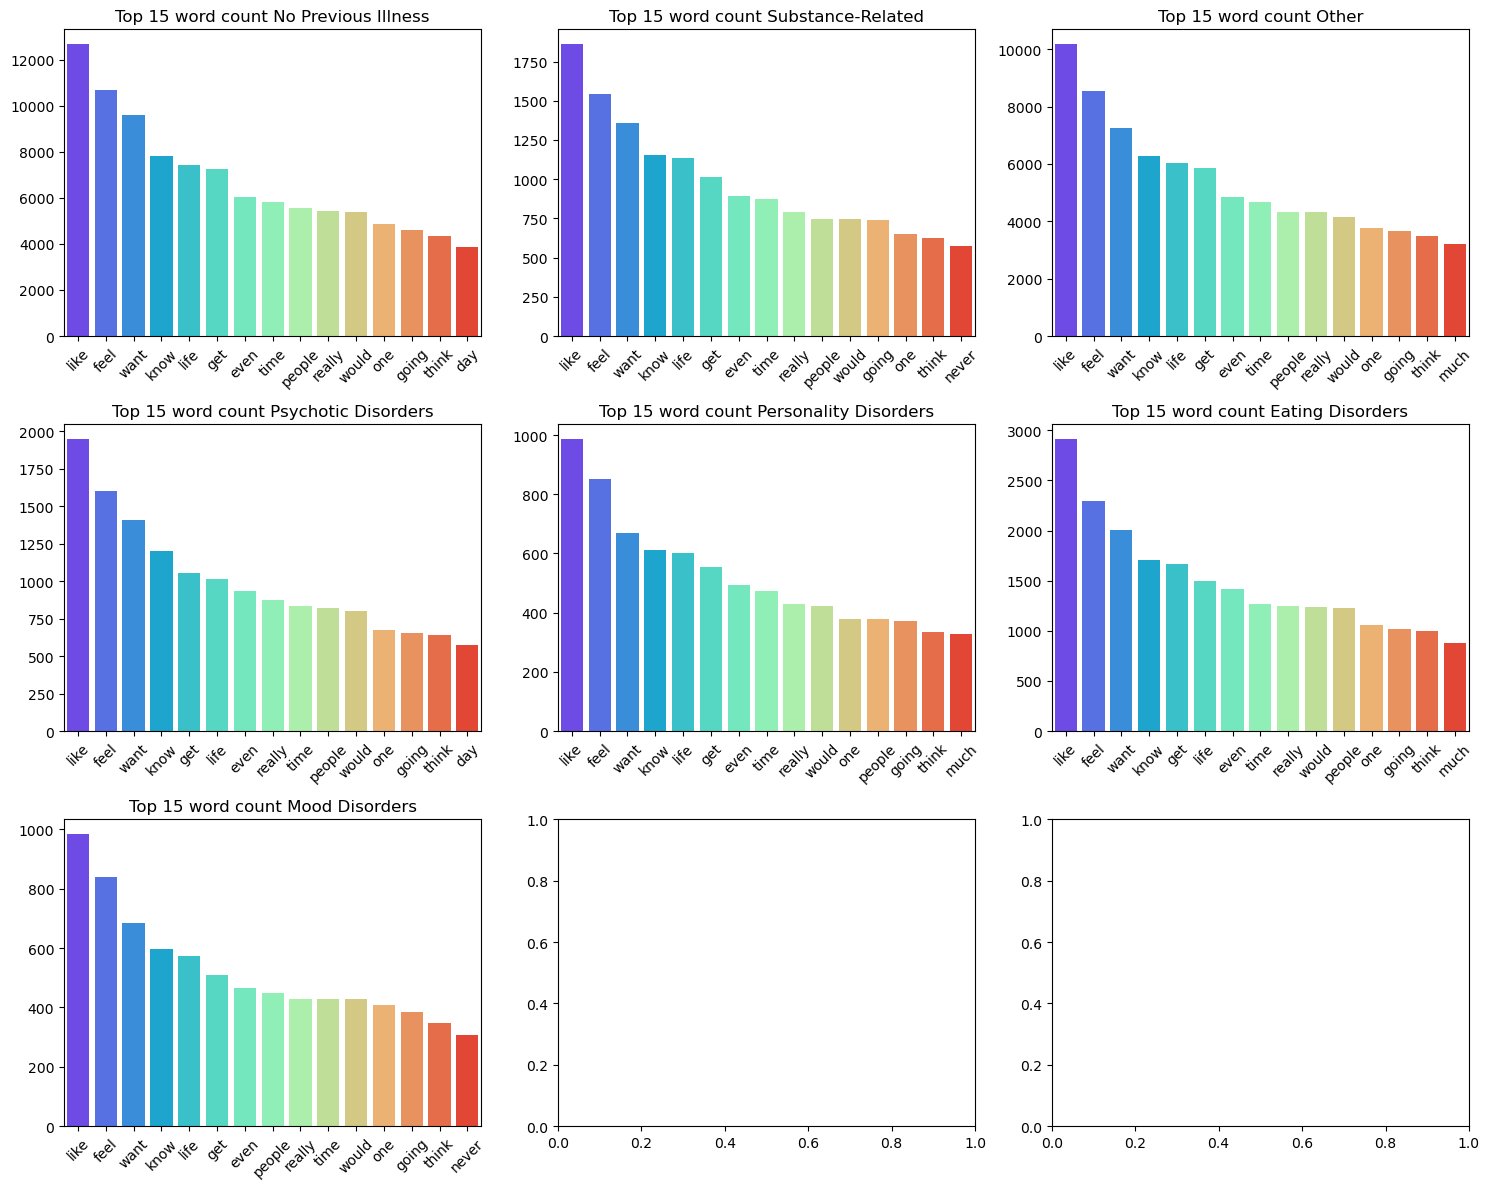

In [12]:
# Plot the top 15 words for each category
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for idx, (category, word_counts) in enumerate(category_word_counts.items()):
    words, counts = zip(*word_counts)
    sns.barplot(x=list(words), y=list(counts), ax=axes[idx], palette="rainbow")
    axes[idx].set_title(f"Top 15 word count {category}")
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [15]:
df.isnull().sum()

author                               0
age                                  0
gender                               0
location                             0
statement                            0
status                               0
mental_illness_type                  0
Mental_Illness_Category              0
text_length                          0
encoded_status                       0
statement_avg_word_length            0
cleaned_statement_avg_word_length    0
text_length_bin                      0
sentiment_score                      0
contains_question                    0
has_negation                         0
exclamation_count                    0
dtype: int64

In [19]:
df.shape

(46270, 17)

C:\Users\abcd\AppData\Local\Temp\ipykernel_21472\816069909.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'])


<Axes: xlabel='text_length', ylabel='Density'>

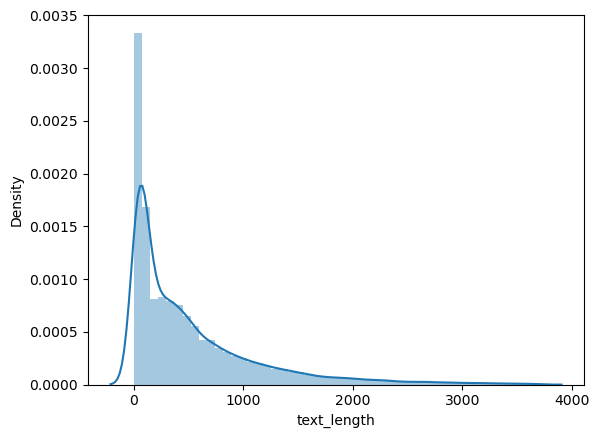

In [25]:
sns.distplot(df['text_length'])

In [19]:
random_statements = df.groupby("status")["statement"].apply(lambda x: x.sample(n=1))

for status, statement in random_statements.items():
    print(f"status: {status}")
    print(f"statement: {statement}", end="\n\n\n")

status: ('anxiety', '18-07-2020')
statement: someone please help first of all i urge anyone who reads this to please give an opinion on what they think it may be, i'm worried sick. thanks in advance.


ok i've made posts about things i've felt before but somehow everything i had 2 weeks ago is now gone and has been replaced by new fears.

i'll get straight to it, here are symptoms with context:

- odd feeling on left side of body, mainly legs, only when laying or sitting. feels like weakness but i can still walk just fine and feel no difference in balance. sort of like fatigue without any actual excercise to cause it, really odd and it scares me.

- tinnitus, already diagnosed 2 years ago with bilateral tinnitus and it's got easier to deal with. but in times like these it makes me feel awful. i'm aware of the recent progresses in tinnitus treatment so it doesn't worry me too much as it's benign and only sounds when i'm in silence.

- constipation, probably caused by the stress or anxie

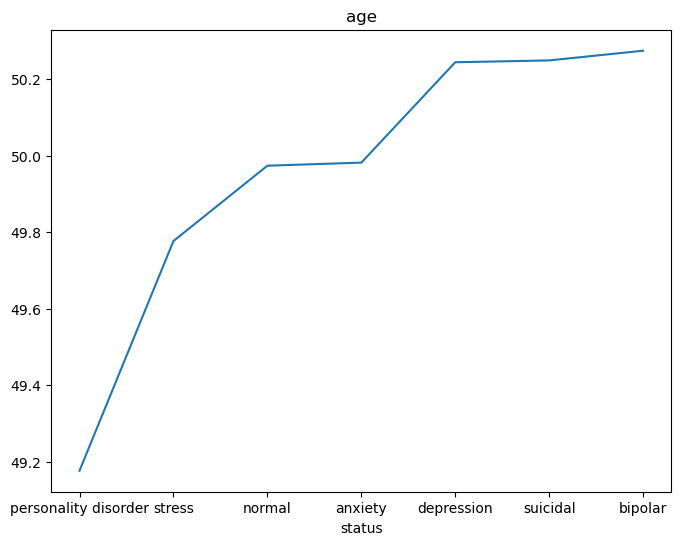

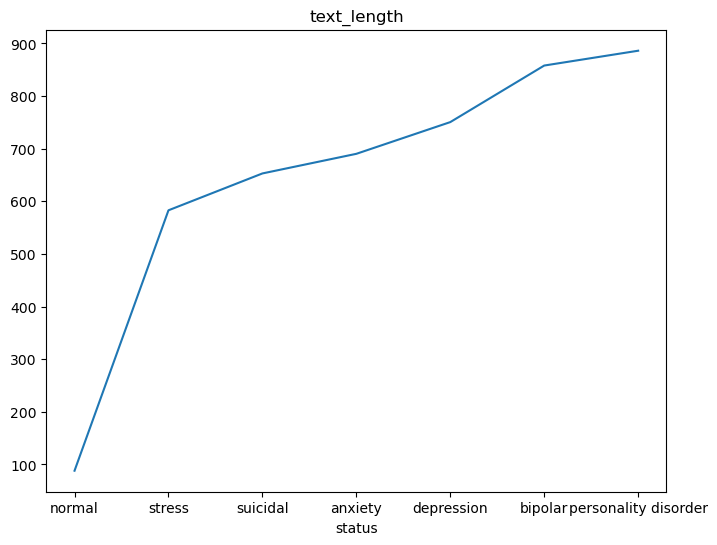

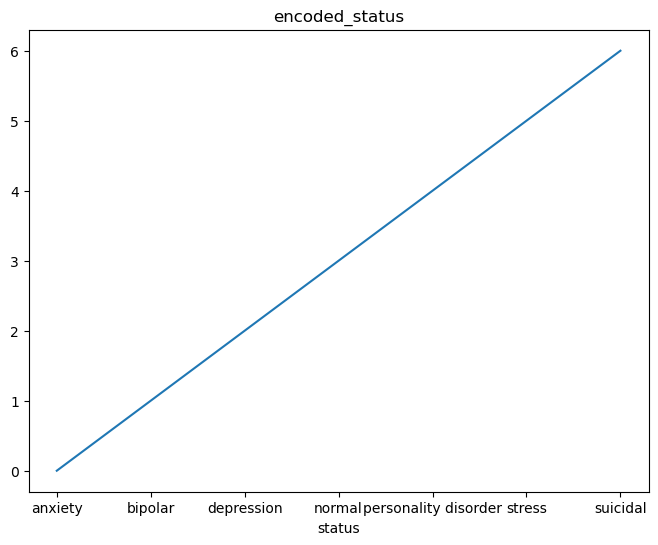

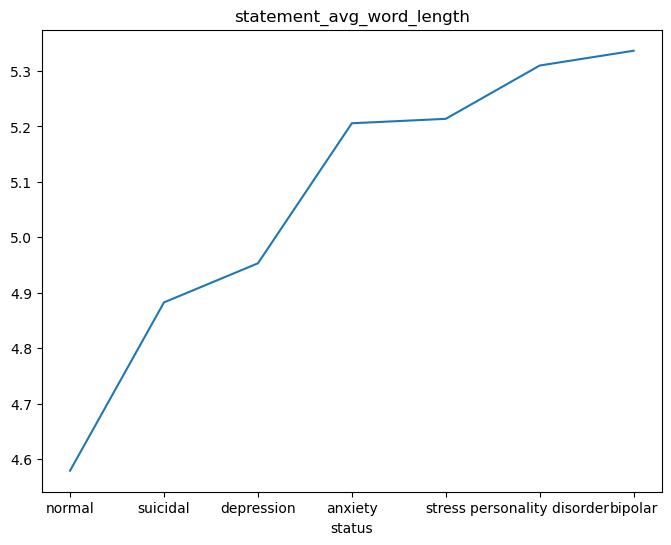

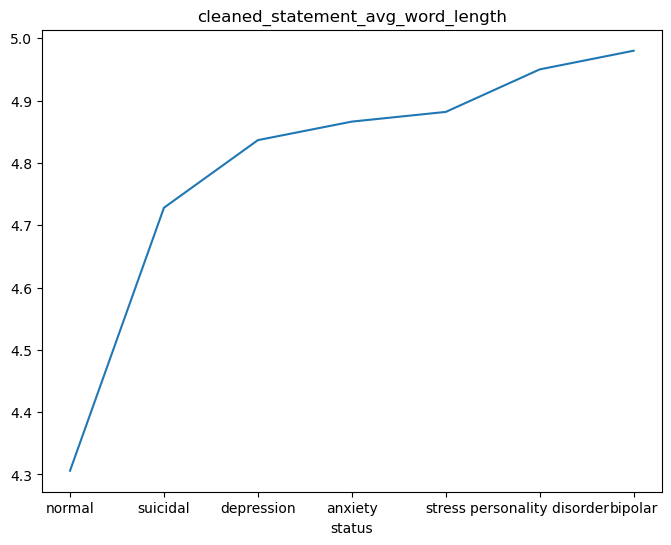

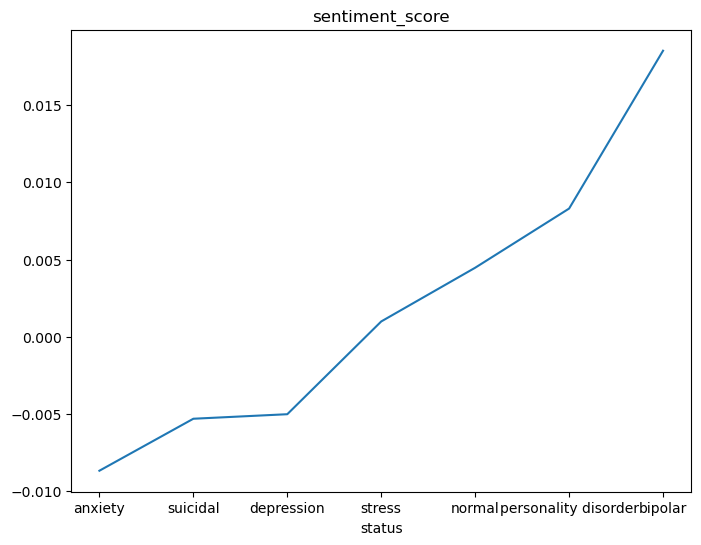

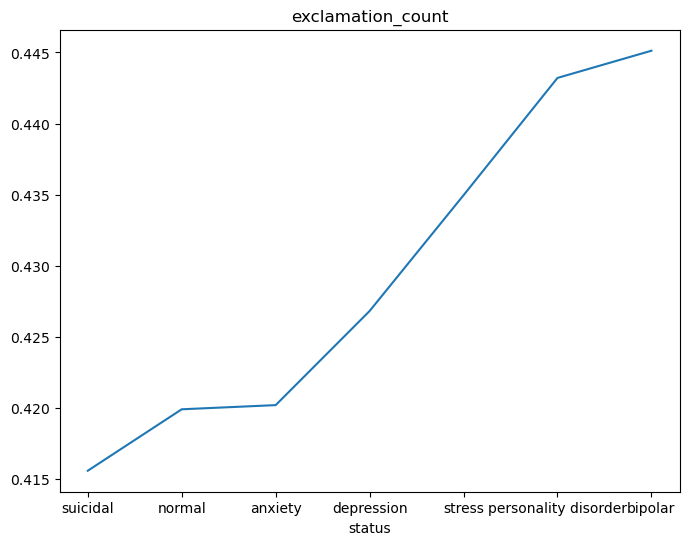

In [39]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

numeric_feature


for feature in numeric_feature:
    plt.figure(figsize= (8,6))
    df.groupby('status')[feature].mean().sort_values().plot()
    plt.title(feature)
    plt.show()

In [11]:
df["text_length"].sort_values(ascending=False)

date_collected
12-07-2021    3690
16-06-2023    3686
28-02-2022    3684
02-06-2022    3682
18-12-2023    3681
              ... 
28-04-2023       2
11-05-2020       2
26-11-2022       2
03-07-2023       2
21-03-2023       2
Name: text_length, Length: 46270, dtype: int64

In [25]:
df["number_of_characters"] = df["statement"].str.len()
df["number_of_sentences"] = df["statement"].apply(lambda x: len(sent_tokenize(x)))

num_of_descb = df[["number_of_characters", "number_of_sentences"]]

print(num_of_descb.describe())

       number_of_characters  number_of_sentences
count          46270.000000         46270.000000
mean             530.963886             5.840501
std              627.051747             6.997576
min                2.000000             1.000000
25%               79.000000             1.000000
50%              314.000000             3.000000
75%              737.750000             8.000000
max             3817.000000            83.000000


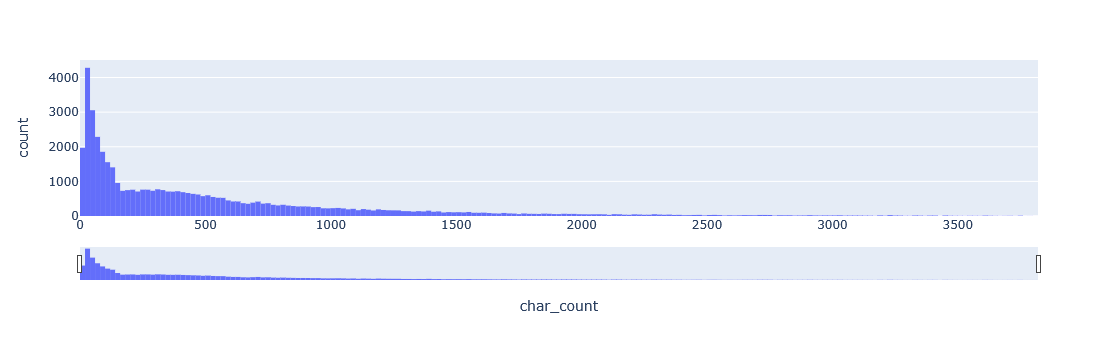

In [43]:
def sentence_count(x):
    return nltk.sent_tokenize(x)
df["char_count"] = df["statement"].str.len()
df["sentences"] = df["statement"].apply(sentence_count)
df["sentence_count"] = df["sentences"].str.len()
fig = px.histogram(df, x="char_count")
fig.update_layout(
    xaxis = dict(
        rangeslider = dict(
            visible = True,
            autorange = True
        )
    )
)
fig.show()

In [51]:
data_prep = df.dropna()
data_prep['tokens'] = data_prep['statement'].apply(lambda x: len(x.split()))
data_prep

author  age  gender location  \
date_collected                                               
07-10-2020       Dr. Steven Marshall   72  Female   Russia   
18-11-2021             Lisa Martinez   68  Female      USA   
27-10-2022           Lindsey Gardner   23  Female    India   
26-12-2020               Aaron Brown   41    Male    India   
23-01-2020               Emily Davis   19  Female      USA   
...                              ...  ...     ...      ...   
30-08-2023             Michelle Beck   39  Female       UK   
17-05-2021                Donna Wood   72    Male      USA   
20-04-2023             Nathan Hughes   90    Male      USA   
05-02-2020      Dr. Stephanie Thomas   85  Female   France   
05-12-2023        Dr. Mr. Keith Byrd   28  Female   Brazil   

                                                        statement      status  \
date_collected                                                                  
07-10-2020      does anyone know? ..how to check the network c...      normal   
18-11-2021      mm twitter appears to have eaten some of my po...      normal   
27-10-2022       we never have to call the police about anything.      normal   
26-12-2020      my primary concern is to get her the surgery a...      normal   
23-01-2020      ich kann nicht mehr... ich will nicht mehr...i...    suicidal   
...                                                           ...         ...   
30-08-2023      don't trust words easily. it's better to see w...      normal   
17-05-2021      slept badly still feel like hell but maybe not...      normal   
20-04-2023      i just do not understand why it is so difficul...  depression   
05-02-2020      idk what to really type here. i guess i am jus...    suicidal   
05-12-2023      it is an honest question because sometimes whe...  depression   

                            mental_illness_type Mental_Illness_Category  \
date_collected                                                            
07-10-2020                              Unknown     No Previous Illness   
18-11-2021                              Unknown     No Previous Illness   
27-10-2022                       Drug Addiction       Substance-Related   
26-12-2020                              Unknown     No Previous Illness   
23-01-2020                              Unknown     No Previous Illness   
...                                         ...                     ...   
30-08-2023      Borderline Personality Disorder   Personality Disorders   
17-05-2021                              Unknown     No Previous Illness   
20-04-2023                              Unknown     No Previous Illness   
05-02-2020             Autism Spectrum Disorder                   Other   
05-12-2023                        Schizophrenia     Psychotic Disorders   

                text_length  encoded_status  ...  \
date_collected                               ...   
07-10-2020               62               3  ...   
18-11-2021               64               3  ...   
27-10-2022               47               3  ...   
26-12-2020              421               3  ...   
23-01-2020             1380               6  ...   
...                     ...             ...  ...   
30-08-2023               68               3  ...   
17-05-2021              110               3  ...   
20-04-2023             1394               2  ...   
05-02-2020              847               6  ...   
05-12-2023              877               2  ...   

                cleaned_statement_avg_word_length  text_length_bin  \
date_collected                                                       
07-10-2020                               5.166667              low   
18-11-2021                               4.923077              low   
27-10-2022                               4.700000              low   
26-12-2020                               4.730337             high   
23-01-2020                               5.247148        very_high   
...                       

In [53]:
# check the minimum, average, median and max no of tokens
print(f'Min: {data_prep["tokens"].min()}')
print(f'Max: {data_prep["tokens"].max()}')
print(f'Avg: {data_prep["tokens"].mean()}')

Min: 1
Max: 790
Avg: 104.19630430084288


In [55]:
data_prep.groupby('status').mean('tokens').round(0)

age  text_length  encoded_status  \
status                                                    
anxiety               50.0        690.0             0.0   
bipolar               50.0        858.0             1.0   
depression            50.0        751.0             2.0   
normal                50.0         88.0             3.0   
personality disorder  49.0        886.0             4.0   
stress                50.0        583.0             5.0   
suicidal              50.0        653.0             6.0   

                      statement_avg_word_length  \
status                                            
anxiety                                     5.0   
bipolar                                     5.0   
depression                                  5.0   
normal                                      5.0   
personality disorder                        5.0   
stress                                      5.0   
suicidal                                    5.0   

                      cleaned_statement_avg_word_length  sentiment_score  \
status                                                                     
anxiety                                             5.0             -0.0   
bipolar                                             5.0              0.0   
depression                                          5.0             -0.0   
normal                                              4.0              0.0   
personality disorder                                5.0              0.0   
stress                                              5.0              0.0   
suicidal                                            5.0             -0.0   

                      exclamation_count  char_count  sentence_count  tokens  
status                                                                       
anxiety                             0.0       709.0             8.0   134.0  
bipolar                             0.0       882.0            10.0   165.0  
depression                          0.0       763.0             7.0   152.0  
normal                              0.0        91.0             2.0    17.0  
personality disorder                0.0       910.0            10.0   171.0  
stress                              0.0       598.0             6.0   113.0  
suicidal                            0.0       667.0             8.0   134.0

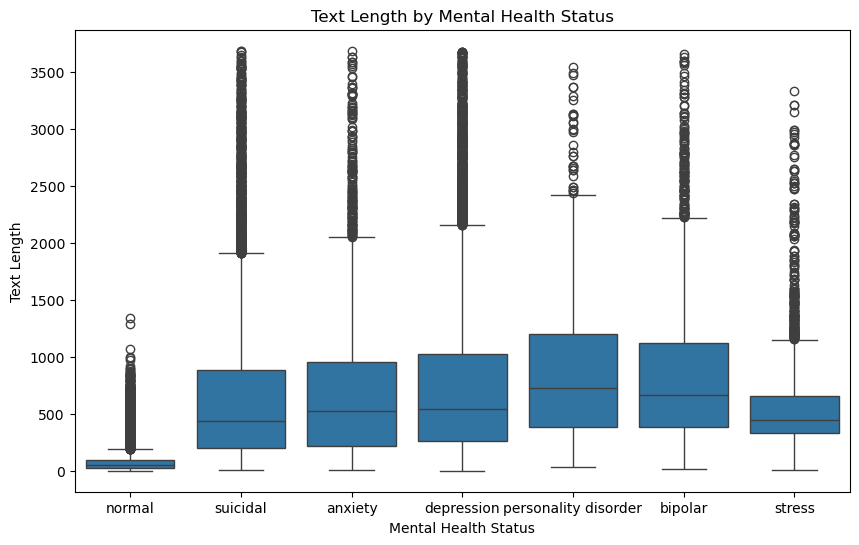

Correlation Matrix:
                text_length  status_numeric
text_length        1.000000       -0.041991
status_numeric    -0.041991        1.000000


In [69]:
# Convert categorical labels to numeric
df['status_numeric'] = pd.Categorical(df['status']).codes

# Plot the relationship between text length and status
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='status', y='text_length')
plt.title('Text Length by Mental Health Status')
plt.xlabel('Mental Health Status')
plt.ylabel('Text Length')
plt.show()

# Compute correlation matrix
correlation_matrix = df[['text_length', 'status_numeric']].corr()
print("Correlation Matrix:")
print(correlation_matrix)

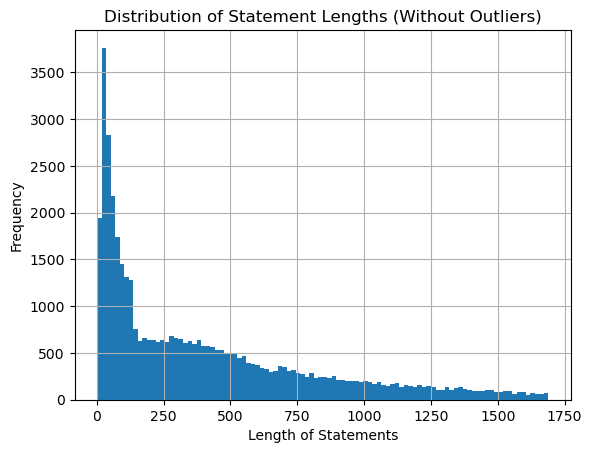

In [75]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['text_length'].quantile(0.25)
Q3 = df['text_length'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bound for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
filtered_df = df[(df['text_length'] >= lower_bound) & (df['text_length'] <= upper_bound)]
# Plot the distribution of statement lengths without outliers
filtered_df['text_length'].hist(bins=100)
plt.title('Distribution of Statement Lengths (Without Outliers)')
plt.xlabel('Length of Statements')
plt.ylabel('Frequency')
plt.show()

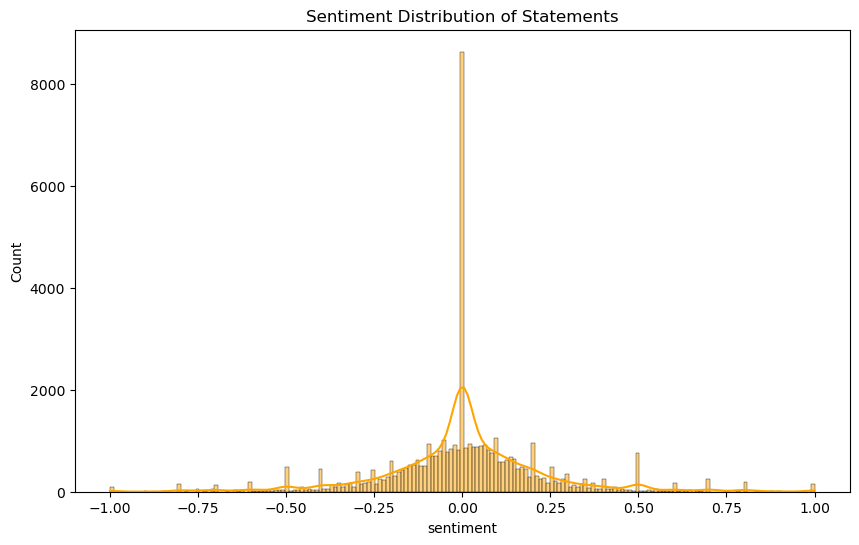

In [81]:
from textblob import TextBlob

# Apply sentiment analysis to each statement
df['sentiment'] = df['statement'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10,6))
sns.histplot(df['sentiment'], kde=True, color='orange')
plt.title('Sentiment Distribution of Statements')
plt.show()

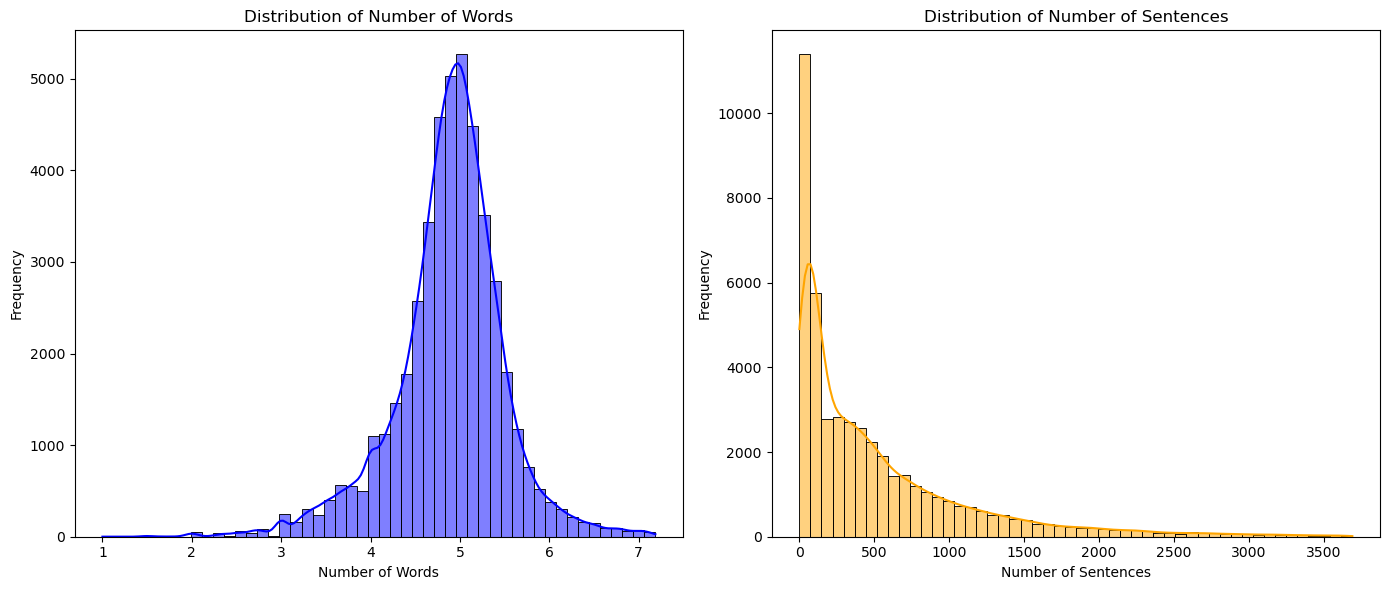

In [87]:
plt.figure(figsize=(14, 6))

# Histogram for number of words
plt.subplot(1, 2, 1)
sns.histplot(df['statement_avg_word_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Number of Words')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')

# Histogram for number of sentences
plt.subplot(1, 2, 2)
sns.histplot(df['text_length'], bins=50, kde=True, color='orange')
plt.title('Distribution of Number of Sentences')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()